
This is an exercise to apply the concepts of data encoding and data scaling

## IMPORT LIB

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
import numpy as np
import warnings 
warnings.filterwarnings('ignore')

## Read CSV files

In [2]:
data = pd.read_csv('combine.csv')
data

,waktu,arah,koridor,target_kecepatan,jarak,target_waktu_tempuh,pencapaian_kecepatan_per_koridor,pencapaian_kecepatan,pencapaian_waktu_tempuh
0,pagi,Selatan - Pusat,Lenteng Agung - Ps. Minggu - Supomo - dr. Saha...,21,19.62,56.06,22.77,24.36,58.82
1,pagi,Selatan - Pusat,Cilandak KKO - Warung Buncit - Mampang Prapata...,21,13.36,38.17,24.14,24.36,36.88
2,pagi,Selatan - Pusat,Pangeran Antasari - Prapanca - Iskandarsyah - ...,21,11.13,31.8,29.64,24.36,25.99
3,pagi,Selatan - Pusat,Pondok Labu - Fatmawati - Panglima Polim - Sis...,21,16.25,46.43,25.82,24.36,44.35
4,pagi,Selatan - Pusat,Pasar Jumat - Metro Pondok Indah - Iskandar Mu...,21,15.87,45.34,28.18,24.36,37.33
...,...,...,...,...,...,...,...,...,...
992,sore,Pusat - Utara,Letjend. Suprapto - Yos Sudarso - Bollevard Ba...,21,20.29,57.97,22.03,23.02,56.04
993,sore,Pusat - Barat,Hayam Wuruk - Hasyim Ashari - Kyai Tapa - Daan...,21,14.47,41.34,20.79,21.11,45.71
994,sore,Pusat - Barat,Hayam Wuruk - Balikpapan - Tomang Raya - S. Pa...,21,15.55,44.43,17.91,21.11,55.19
995,sore,Pusat - Barat,Kebon Sirih - Jatibaru - Katamso - Kemanggisan...,21,17.43,49.8,23.41,21.11,52.63


## Data Preprocessing / Cleaning

In [3]:
data = data[data['target_kecepatan'] != "target_kecepatan" ]

In [4]:
#cek apakah ada data yang hilang
for i in data.columns:
    n_miss = data[[i]].isnull().sum()
    perc = n_miss / data.shape[0] *100
    print('> %s, Missing: %d (%.1f%%)'%(i,n_miss,perc))

> waktu, Missing: 2 (0.2%)
> arah, Missing: 2 (0.2%)
> koridor, Missing: 2 (0.2%)
> target_kecepatan, Missing: 43 (4.4%)
> jarak, Missing: 2 (0.2%)
> target_waktu_tempuh, Missing: 2 (0.2%)
> pencapaian_kecepatan_per_koridor, Missing: 2 (0.2%)
> pencapaian_kecepatan, Missing: 2 (0.2%)
> pencapaian_waktu_tempuh, Missing: 2 (0.2%)


In [5]:
before = data.shape
data = data.dropna()
after = data.shape
print("Sebelum:", before,
      "\nSesudah:",after,
      "\nTotal baris yang di drop:",(before[0]-after[0]),"baris")

Sebelum: (986, 9) 
Sesudah: (943, 9) 
Total baris yang di drop: 43 baris


In [6]:
#cek apakah ada data yang hilang
for i in data.columns:
    n_miss = data[[i]].isnull().sum()
    perc = n_miss / data.shape[0] *100
    print('> %s, Missing: %d (%.1f%%)'%(i,n_miss,perc))

> waktu, Missing: 0 (0.0%)
> arah, Missing: 0 (0.0%)
> koridor, Missing: 0 (0.0%)
> target_kecepatan, Missing: 0 (0.0%)
> jarak, Missing: 0 (0.0%)
> target_waktu_tempuh, Missing: 0 (0.0%)
> pencapaian_kecepatan_per_koridor, Missing: 0 (0.0%)
> pencapaian_kecepatan, Missing: 0 (0.0%)
> pencapaian_waktu_tempuh, Missing: 0 (0.0%)


In [7]:
#melakukan pengecekan tipe data
data.dtypes

waktu                               object
arah                                object
koridor                             object
target_kecepatan                    object
jarak                               object
target_waktu_tempuh                 object
pencapaian_kecepatan_per_koridor    object
pencapaian_kecepatan                object
pencapaian_waktu_tempuh             object
dtype: object

In [8]:
for i in data.columns[3:9]:
    data[i]= pd.to_numeric(data[i])
data

,waktu,arah,koridor,target_kecepatan,jarak,target_waktu_tempuh,pencapaian_kecepatan_per_koridor,pencapaian_kecepatan,pencapaian_waktu_tempuh
0,pagi,Selatan - Pusat,Lenteng Agung - Ps. Minggu - Supomo - dr. Saha...,21.0,19.62,56.06,22.77,24.36,58.82
1,pagi,Selatan - Pusat,Cilandak KKO - Warung Buncit - Mampang Prapata...,21.0,13.36,38.17,24.14,24.36,36.88
2,pagi,Selatan - Pusat,Pangeran Antasari - Prapanca - Iskandarsyah - ...,21.0,11.13,31.80,29.64,24.36,25.99
3,pagi,Selatan - Pusat,Pondok Labu - Fatmawati - Panglima Polim - Sis...,21.0,16.25,46.43,25.82,24.36,44.35
4,pagi,Selatan - Pusat,Pasar Jumat - Metro Pondok Indah - Iskandar Mu...,21.0,15.87,45.34,28.18,24.36,37.33
...,...,...,...,...,...,...,...,...,...
992,sore,Pusat - Utara,Letjend. Suprapto - Yos Sudarso - Bollevard Ba...,21.0,20.29,57.97,22.03,23.02,56.04
993,sore,Pusat - Barat,Hayam Wuruk - Hasyim Ashari - Kyai Tapa - Daan...,21.0,14.47,41.34,20.79,21.11,45.71
994,sore,Pusat - Barat,Hayam Wuruk - Balikpapan - Tomang Raya - S. Pa...,21.0,15.55,44.43,17.91,21.11,55.19
995,sore,Pusat - Barat,Kebon Sirih - Jatibaru - Katamso - Kemanggisan...,21.0,17.43,49.80,23.41,21.11,52.63


In [9]:
data.dtypes

waktu                                object
arah                                 object
koridor                              object
target_kecepatan                    float64
jarak                               float64
target_waktu_tempuh                 float64
pencapaian_kecepatan_per_koridor    float64
pencapaian_kecepatan                float64
pencapaian_waktu_tempuh             float64
dtype: object

In [10]:
for i in data.columns[0:3]:
    print(pd.unique(data[i]))

['pagi' 'sore' 'Pagi' 'Sore']
['Selatan - Pusat' 'Timur - Pusat' 'Utara - Pusat' 'Barat - Pusat'
 'Pusat - Selatan' 'Pusat - Timur' 'Pusat - Utara' 'Pusat - Barat'
 'Utara - Pusa' 'selatan - Pusat']
['Lenteng Agung - Ps. Minggu - Supomo - dr. Saharjo - Sultan Agung - Cik Ditiro - Menteng Raya - Tugu Tani'
 'Cilandak KKO - Warung Buncit - Mampang Prapatan - Rasuna Said - HOS Cokroaminoto'
 'Pangeran Antasari - Prapanca - Iskandarsyah - Pattimura - Jend. Sudirman - MH. Thamrin'
 'Pondok Labu - Fatmawati - Panglima Polim - Sisingamangaraja - Jend.  Sudirman - Thamrin'
 'Pasar Jumat - Metro Pondok Indah - Iskandar Muda - Teuku Nyak Arief - Tentara Pelajar - Pejompongan - Penjernihan 1 - Mas Mansyur (Tanah Abang)'
 'Ciledug Raya - Keb Lama - Pakubuwono 6 - Hang Leukir - Asia Afrika - Pintu 1  Senayan - Jend. Sudirman'
 'Raya Ciputat - Tanah Kusir - Bungur - Iskandar Muda - Tentara Pelajar - Pejompongan - Penjernihan 1 - Mas Mansyur (Tanah Abang)'
 'Raya Bekasi - Perintis Kemerdekaan - Letje

dapat dilihat dari hasil diatas bahwa ada beberapa data yang typo dan sebenarnya memiliki arti yang sama seperti Pagi dengan pagi atau Utara - Pusa dengan Utara - Pusat, sehingga harus diperbaiki dulu datanya dengan cara mengganti data yang typo menjadi data yang benar

In [11]:
data["waktu"].replace({"pagi": "Pagi", "sore": "Sore"}, inplace=True)
data['waktu'].value_counts()

Pagi    492
Sore    451
Name: waktu, dtype: int64

In [12]:
data["arah"].replace({"Utara - Pusa": "Utara - Pusat", "selatan - Pusat": "Selatan - Pusat"}, inplace=True)
data['arah'].value_counts()

Selatan - Pusat    161
Pusat - Selatan    138
Timur - Pusat      115
Utara - Pusat      115
Pusat - Timur      115
Pusat - Utara      115
Barat - Pusat       92
Pusat - Barat       92
Name: arah, dtype: int64

## Nomor 1

In [13]:
#numerical data only
data01 = data.select_dtypes(include=np.number)
data01

,target_kecepatan,jarak,target_waktu_tempuh,pencapaian_kecepatan_per_koridor,pencapaian_kecepatan,pencapaian_waktu_tempuh
0,21.0,19.62,56.06,22.77,24.36,58.82
1,21.0,13.36,38.17,24.14,24.36,36.88
2,21.0,11.13,31.80,29.64,24.36,25.99
3,21.0,16.25,46.43,25.82,24.36,44.35
4,21.0,15.87,45.34,28.18,24.36,37.33
...,...,...,...,...,...,...
992,21.0,20.29,57.97,22.03,23.02,56.04
993,21.0,14.47,41.34,20.79,21.11,45.71
994,21.0,15.55,44.43,17.91,21.11,55.19
995,21.0,17.43,49.80,23.41,21.11,52.63


In [14]:
linreg = LinearRegression()

x1 = data01.drop(["pencapaian_kecepatan"], axis=1)
y1 = data01["pencapaian_kecepatan"]
X_train, X_test, y_train, y_test = train_test_split(x1, y1, test_size=0.3, random_state=42)

kfold = KFold(n_splits = 5, shuffle = True, random_state = 42)
scores = cross_val_score(linreg, x1, y1, scoring='neg_mean_absolute_error', cv=kfold, n_jobs=-1)

meanScores = round(np.mean(np.absolute(scores)),3)
meanStd = round(scores.std(),3)
linreg.fit(X_train,y_train)
y_hat = linreg.predict(X_test)
mae = round(mean_absolute_error(y_test,y_hat),3)

### Accuracy

In [15]:
print(f'Cross Val MAE Mean = {meanScores}')
print(f'Cross Val MAE Std = {meanStd}')
print(f'Non Cross Val MAE = {mae}')

Cross Val MAE Mean = 2.025
Cross Val MAE Std = 0.044
Non Cross Val MAE = 2.064


## Nomor 2

In [16]:
data02 = data01.drop(['pencapaian_kecepatan'],axis=1)
data02

,target_kecepatan,jarak,target_waktu_tempuh,pencapaian_kecepatan_per_koridor,pencapaian_waktu_tempuh
0,21.0,19.62,56.06,22.77,58.82
1,21.0,13.36,38.17,24.14,36.88
2,21.0,11.13,31.80,29.64,25.99
3,21.0,16.25,46.43,25.82,44.35
4,21.0,15.87,45.34,28.18,37.33
...,...,...,...,...,...
992,21.0,20.29,57.97,22.03,56.04
993,21.0,14.47,41.34,20.79,45.71
994,21.0,15.55,44.43,17.91,55.19
995,21.0,17.43,49.80,23.41,52.63


### Normalization

In [17]:
normal_scaler = MinMaxScaler()
norm_data02 = pd.DataFrame(normal_scaler.fit_transform(data02))
norm_data02.columns = data02.columns
norm_data02

,target_kecepatan,jarak,target_waktu_tempuh,pencapaian_kecepatan_per_koridor,pencapaian_waktu_tempuh
0,0.4,0.875392,0.761832,0.226399,0.651410
1,0.4,0.384796,0.371647,0.265122,0.335636
2,0.4,0.210031,0.232715,0.420577,0.178900
3,0.4,0.611285,0.551799,0.312606,0.443149
4,0.4,0.581505,0.528026,0.379310,0.342113
...,...,...,...,...,...
938,0.4,0.927900,0.803490,0.205483,0.611399
939,0.4,0.471787,0.440785,0.170435,0.462723
940,0.4,0.556426,0.508179,0.089033,0.599165
941,0.4,0.703762,0.625300,0.244488,0.562320


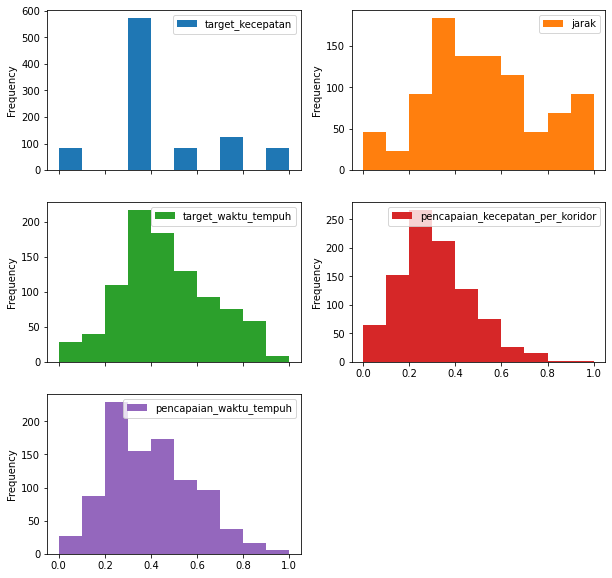

In [18]:
norm_data02.plot.hist(subplots=True, legend=True, layout=(3, 2), figsize =(10,10))
plt.show()

### Standarization

In [19]:
std = StandardScaler()
std_data02 = pd.DataFrame(std.fit_transform(data02))
std_data02.columns = data02.columns
std_data02

,target_kecepatan,jarak,target_waktu_tempuh,pencapaian_kecepatan_per_koridor,pencapaian_waktu_tempuh
0,-0.232624,1.511478,1.513242,-0.575184,1.335042
1,-0.232624,-0.549380,-0.480680,-0.325759,-0.345691
2,-0.232624,-1.283520,-1.190646,0.675581,-1.179928
3,-0.232624,0.402038,0.439935,-0.019896,0.226555
4,-0.232624,0.276938,0.318449,0.409770,-0.311218
...,...,...,...,...,...
938,-0.232624,1.732049,1.726121,-0.709910,1.122077
939,-0.232624,-0.183956,-0.127369,-0.935667,0.330739
940,-0.232624,0.171591,0.217026,-1.460005,1.056962
941,-0.232624,0.790507,0.815537,-0.458665,0.860852


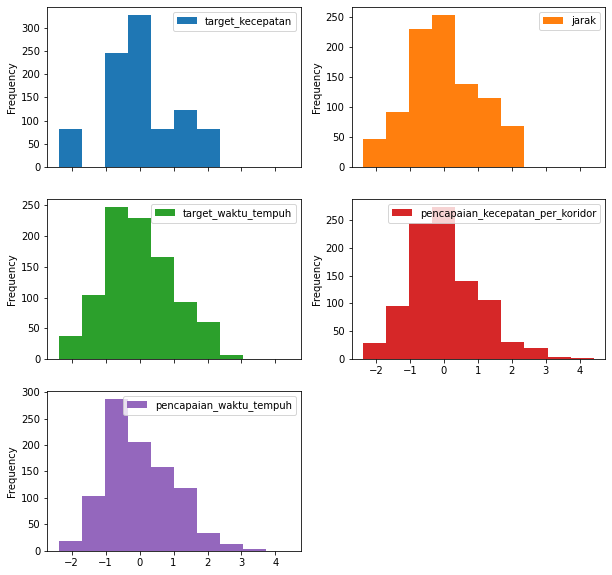

In [20]:
std_data02.plot.hist(subplots=True, legend=True, layout=(3, 2), figsize =(10,10))
plt.show()

### Robust

In [21]:
rbs = RobustScaler()
rbs_data02 = pd.DataFrame(rbs.fit_transform(data02))
rbs_data02.columns = data02.columns
rbs_data02

,target_kecepatan,jarak,target_waktu_tempuh,pencapaian_kecepatan_per_koridor,pencapaian_waktu_tempuh
0,0.0,1.262755,1.271339,-0.343593,0.994661
1,0.0,-0.334184,-0.336029,-0.147459,-0.176722
2,0.0,-0.903061,-0.908356,0.639943,-0.758142
3,0.0,0.403061,0.406110,0.093057,0.222104
4,0.0,0.306122,0.308176,0.430923,-0.152696
...,...,...,...,...,...
938,0.0,1.433673,1.442947,-0.449535,0.846236
939,0.0,-0.051020,-0.051213,-0.627058,0.294714
940,0.0,0.224490,0.226415,-1.039370,0.800854
941,0.0,0.704082,0.708895,-0.251969,0.664175


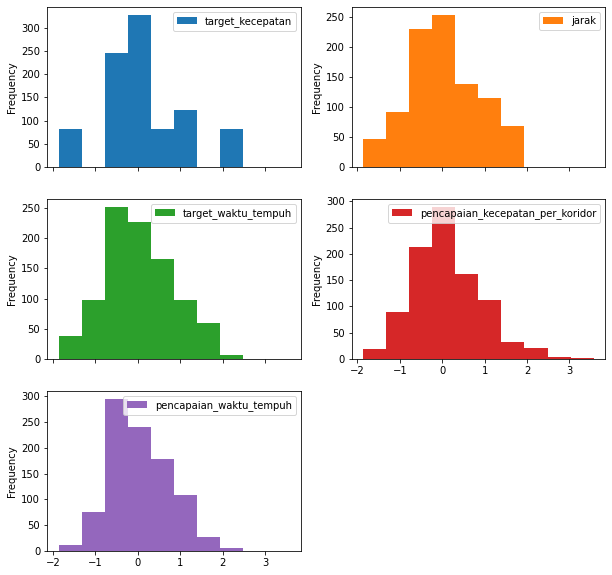

In [22]:
rbs_data02.plot.hist(subplots=True, legend=True, layout=(3, 2), figsize =(10,10))
plt.show()

### Accuracy

In [23]:
linreg021 = LinearRegression()
x1 = norm_data02
y1 = data01["pencapaian_kecepatan"]
X_train, X_test, y_train, y_test = train_test_split(x1, y1, test_size=0.3, random_state=42)

kfold = KFold(n_splits = 5, shuffle = True, random_state = 42)
scores = cross_val_score(linreg021, x1, y1, scoring='neg_mean_absolute_error', cv=kfold, n_jobs=-1)

meanScores = round(np.mean(np.absolute(scores)),3)
meanStd = round(scores.std(),3)
linreg021.fit(X_train,y_train)
y_hat = linreg021.predict(X_test)
mae = round(mean_absolute_error(y_test,y_hat),3)

normal = [meanScores,meanStd,mae]

In [24]:
linreg022 = LinearRegression()
x1 = std_data02
y1 = data01["pencapaian_kecepatan"]
X_train, X_test, y_train, y_test = train_test_split(x1, y1, test_size=0.3, random_state=42)

kfold = KFold(n_splits = 5, shuffle = True, random_state = 42)
scores = cross_val_score(linreg022, x1, y1, scoring='neg_mean_absolute_error', cv=kfold, n_jobs=-1)

meanScores = round(np.mean(np.absolute(scores)),3)
meanStd = round(scores.std(),3)
linreg022.fit(X_train,y_train)
y_hat = linreg022.predict(X_test)
mae = round(mean_absolute_error(y_test,y_hat),3)

standard = [meanScores,meanStd,mae]

In [25]:
linreg023 = LinearRegression()
x1 = rbs_data02
y1 = data01["pencapaian_kecepatan"]
X_train, X_test, y_train, y_test = train_test_split(x1, y1, test_size=0.3, random_state=42)

kfold = KFold(n_splits = 5, shuffle = True, random_state = 42)
scores = cross_val_score(linreg023, x1, y1, scoring='neg_mean_absolute_error', cv=kfold, n_jobs=-1)

meanScores = round(np.mean(np.absolute(scores)),3)
meanStd = round(scores.std(),3)
linreg023.fit(X_train,y_train)
y_hat = linreg023.predict(X_test)
mae = round(mean_absolute_error(y_test,y_hat),3)

robust = [meanScores,meanStd,mae]

In [26]:
print(f'Cross Val MAE Mean (Normalization) = {normal[0]}')
print(f'Cross Val MAE Std (Normalization) = {normal[1]}')
print(f'Non Cross Val MAE (Normalization) = {normal[2]}\n')

print(f'Cross Val MAE Mean (Standarization) = {standard[0]}')
print(f'Cross Val MAE Std (Standarization) = {standard[1]}')
print(f'Non Cross Val MAE (Standarization) = {standard[2]}\n')

print(f'Cross Val MAE Mean (Robust) = {robust[0]}')
print(f'Cross Val MAE Std (Robust) = {robust[1]}')
print(f'Non Cross Val MAE (Robust) = {robust[2]}\n')

Cross Val MAE Mean (Normalization) = 2.025
Cross Val MAE Std (Normalization) = 0.044
Non Cross Val MAE (Normalization) = 2.064

Cross Val MAE Mean (Standarization) = 2.025
Cross Val MAE Std (Standarization) = 0.044
Non Cross Val MAE (Standarization) = 2.064

Cross Val MAE Mean (Robust) = 2.025
Cross Val MAE Std (Robust) = 0.044
Non Cross Val MAE (Robust) = 2.064



## Nomor 3

In [27]:
data03 = data.select_dtypes(exclude=np.number)
data03

,waktu,arah,koridor
0,Pagi,Selatan - Pusat,Lenteng Agung - Ps. Minggu - Supomo - dr. Saha...
1,Pagi,Selatan - Pusat,Cilandak KKO - Warung Buncit - Mampang Prapata...
2,Pagi,Selatan - Pusat,Pangeran Antasari - Prapanca - Iskandarsyah - ...
3,Pagi,Selatan - Pusat,Pondok Labu - Fatmawati - Panglima Polim - Sis...
4,Pagi,Selatan - Pusat,Pasar Jumat - Metro Pondok Indah - Iskandar Mu...
...,...,...,...
992,Sore,Pusat - Utara,Letjend. Suprapto - Yos Sudarso - Bollevard Ba...
993,Sore,Pusat - Barat,Hayam Wuruk - Hasyim Ashari - Kyai Tapa - Daan...
994,Sore,Pusat - Barat,Hayam Wuruk - Balikpapan - Tomang Raya - S. Pa...
995,Sore,Pusat - Barat,Kebon Sirih - Jatibaru - Katamso - Kemanggisan...


### OHE

In [28]:
x1 = data03
y1 = data01["pencapaian_kecepatan"]
oneHotEncoder = OneHotEncoder(sparse=False)
OHE_data03 = pd.DataFrame(oneHotEncoder.fit_transform(x1))
OHE_data03

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,50
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
938,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
939,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
940,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
941,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### ORDINAL ENCODER

In [29]:
x1 = data03
y1 = data01["pencapaian_kecepatan"]
OrdinalEncoder = OrdinalEncoder()
ORD_data03 = pd.DataFrame(OrdinalEncoder.fit_transform(x1))
ORD_data03

,0,1,2
0,0.0,5.0,16.0
1,0.0,5.0,0.0
2,0.0,5.0,25.0
3,0.0,5.0,29.0
4,0.0,5.0,26.0
...,...,...,...
938,1.0,4.0,17.0
939,1.0,1.0,5.0
940,1.0,1.0,4.0
941,1.0,1.0,13.0


### Accuracy

In [30]:
linreg031 = LinearRegression()
x1 = OHE_data03
y1 = data01["pencapaian_kecepatan"]
X_train, X_test, y_train, y_test = train_test_split(x1, y1, test_size=0.3, random_state=42)

kfold = KFold(n_splits = 5, shuffle = True, random_state = 42)
scores = cross_val_score(linreg031, x1, y1, scoring='neg_mean_absolute_error', cv=kfold, n_jobs=-1)

meanScores = round(np.mean(np.absolute(scores)),3)
meanStd = round(scores.std(),3)
linreg031.fit(X_train,y_train)
y_hat = linreg031.predict(X_test)
mae = round(mean_absolute_error(y_test,y_hat),3)

OHE = [meanScores,meanStd,mae]

In [31]:
linreg032 = LinearRegression()
x1 = ORD_data03
y1 = data01["pencapaian_kecepatan"]
X_train, X_test, y_train, y_test = train_test_split(x1, y1, test_size=0.3, random_state=42)

kfold = KFold(n_splits = 5, shuffle = True, random_state = 42)
scores = cross_val_score(linreg032, x1, y1, scoring='neg_mean_absolute_error', cv=kfold, n_jobs=-1)

meanScores = round(np.mean(np.absolute(scores)),3)
meanStd = round(scores.std(),3)
linreg032.fit(X_train,y_train)
y_hat = linreg032.predict(X_test)
mae = round(mean_absolute_error(y_test,y_hat),3)

ORD = [meanScores,meanStd,mae]

In [32]:
print(f'Cross Val MAE Mean (oneHotEncoder) = {OHE[0]}')
print(f'Cross Val MAE Std (oneHotEncoder) = {OHE[1]}')
print(f'Non Cross Val MAE (oneHotEncoder) = {OHE[2]}\n')

print(f'Cross Val MAE Mean (OrdinalEncoder) = {ORD[0]}')
print(f'Cross Val MAE Std (OrdinalEncoder) = {ORD[1]}')
print(f'Non Cross Val MAE (OrdinalEncoder) = {ORD[2]}\n')

Cross Val MAE Mean (oneHotEncoder) = 3.148
Cross Val MAE Std (oneHotEncoder) = 0.122
Non Cross Val MAE (oneHotEncoder) = 4.153

Cross Val MAE Mean (OrdinalEncoder) = 3.182
Cross Val MAE Std (OrdinalEncoder) = 0.104
Non Cross Val MAE (OrdinalEncoder) = 3.246



# Nomor 4

### OneHotEncoder + Normalization

In [33]:
NORM_OHE = pd.concat([OHE_data03,norm_data02], axis=1)
NORM_OHE

,0,1,2,3,4,5,6,7,8,9,...,46,47,48,49,50,target_kecepatan,jarak,target_waktu_tempuh,pencapaian_kecepatan_per_koridor,pencapaian_waktu_tempuh
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.4,0.875392,0.761832,0.226399,0.651410
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.4,0.384796,0.371647,0.265122,0.335636
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.4,0.210031,0.232715,0.420577,0.178900
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.4,0.611285,0.551799,0.312606,0.443149
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.4,0.581505,0.528026,0.379310,0.342113
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
938,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.4,0.927900,0.803490,0.205483,0.611399
939,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.4,0.471787,0.440785,0.170435,0.462723
940,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.4,0.556426,0.508179,0.089033,0.599165
941,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.4,0.703762,0.625300,0.244488,0.562320


### OneHotEncoder + Standarization

In [34]:
STD_OHE = pd.concat([OHE_data03,std_data02], axis=1)
STD_OHE

,0,1,2,3,4,5,6,7,8,9,...,46,47,48,49,50,target_kecepatan,jarak,target_waktu_tempuh,pencapaian_kecepatan_per_koridor,pencapaian_waktu_tempuh
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,-0.232624,1.511478,1.513242,-0.575184,1.335042
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,-0.232624,-0.549380,-0.480680,-0.325759,-0.345691
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,-0.232624,-1.283520,-1.190646,0.675581,-1.179928
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,-0.232624,0.402038,0.439935,-0.019896,0.226555
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,-0.232624,0.276938,0.318449,0.409770,-0.311218
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
938,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,-0.232624,1.732049,1.726121,-0.709910,1.122077
939,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,-0.232624,-0.183956,-0.127369,-0.935667,0.330739
940,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,-0.232624,0.171591,0.217026,-1.460005,1.056962
941,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,-0.232624,0.790507,0.815537,-0.458665,0.860852


### OneHotEncoder + Robust

In [35]:
RBS_OHE = pd.concat([OHE_data03, rbs_data02], axis=1)
RBS_OHE

,0,1,2,3,4,5,6,7,8,9,...,46,47,48,49,50,target_kecepatan,jarak,target_waktu_tempuh,pencapaian_kecepatan_per_koridor,pencapaian_waktu_tempuh
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.262755,1.271339,-0.343593,0.994661
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-0.334184,-0.336029,-0.147459,-0.176722
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-0.903061,-0.908356,0.639943,-0.758142
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.403061,0.406110,0.093057,0.222104
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.306122,0.308176,0.430923,-0.152696
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
938,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.433673,1.442947,-0.449535,0.846236
939,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-0.051020,-0.051213,-0.627058,0.294714
940,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.224490,0.226415,-1.039370,0.800854
941,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.704082,0.708895,-0.251969,0.664175


### OrdinalEncoder + Normalization

In [36]:
NORM_ORD = pd.concat([ORD_data03, norm_data02], axis=1)
NORM_ORD

,0,1,2,target_kecepatan,jarak,target_waktu_tempuh,pencapaian_kecepatan_per_koridor,pencapaian_waktu_tempuh
0,0.0,5.0,16.0,0.4,0.875392,0.761832,0.226399,0.651410
1,0.0,5.0,0.0,0.4,0.384796,0.371647,0.265122,0.335636
2,0.0,5.0,25.0,0.4,0.210031,0.232715,0.420577,0.178900
3,0.0,5.0,29.0,0.4,0.611285,0.551799,0.312606,0.443149
4,0.0,5.0,26.0,0.4,0.581505,0.528026,0.379310,0.342113
...,...,...,...,...,...,...,...,...
938,1.0,4.0,17.0,0.4,0.927900,0.803490,0.205483,0.611399
939,1.0,1.0,5.0,0.4,0.471787,0.440785,0.170435,0.462723
940,1.0,1.0,4.0,0.4,0.556426,0.508179,0.089033,0.599165
941,1.0,1.0,13.0,0.4,0.703762,0.625300,0.244488,0.562320


### OrdinalEncoder + Standarization

In [37]:
STD_ORD = pd.concat([ORD_data03, std_data02], axis=1)
STD_ORD

,0,1,2,target_kecepatan,jarak,target_waktu_tempuh,pencapaian_kecepatan_per_koridor,pencapaian_waktu_tempuh
0,0.0,5.0,16.0,-0.232624,1.511478,1.513242,-0.575184,1.335042
1,0.0,5.0,0.0,-0.232624,-0.549380,-0.480680,-0.325759,-0.345691
2,0.0,5.0,25.0,-0.232624,-1.283520,-1.190646,0.675581,-1.179928
3,0.0,5.0,29.0,-0.232624,0.402038,0.439935,-0.019896,0.226555
4,0.0,5.0,26.0,-0.232624,0.276938,0.318449,0.409770,-0.311218
...,...,...,...,...,...,...,...,...
938,1.0,4.0,17.0,-0.232624,1.732049,1.726121,-0.709910,1.122077
939,1.0,1.0,5.0,-0.232624,-0.183956,-0.127369,-0.935667,0.330739
940,1.0,1.0,4.0,-0.232624,0.171591,0.217026,-1.460005,1.056962
941,1.0,1.0,13.0,-0.232624,0.790507,0.815537,-0.458665,0.860852


### OrdinalEncoder + Robust

In [38]:
RBS_ORD = pd.concat([ORD_data03, rbs_data02], axis=1)
RBS_ORD

,0,1,2,target_kecepatan,jarak,target_waktu_tempuh,pencapaian_kecepatan_per_koridor,pencapaian_waktu_tempuh
0,0.0,5.0,16.0,0.0,1.262755,1.271339,-0.343593,0.994661
1,0.0,5.0,0.0,0.0,-0.334184,-0.336029,-0.147459,-0.176722
2,0.0,5.0,25.0,0.0,-0.903061,-0.908356,0.639943,-0.758142
3,0.0,5.0,29.0,0.0,0.403061,0.406110,0.093057,0.222104
4,0.0,5.0,26.0,0.0,0.306122,0.308176,0.430923,-0.152696
...,...,...,...,...,...,...,...,...
938,1.0,4.0,17.0,0.0,1.433673,1.442947,-0.449535,0.846236
939,1.0,1.0,5.0,0.0,-0.051020,-0.051213,-0.627058,0.294714
940,1.0,1.0,4.0,0.0,0.224490,0.226415,-1.039370,0.800854
941,1.0,1.0,13.0,0.0,0.704082,0.708895,-0.251969,0.664175


### Accuracy

In [39]:
a = []
for i in ([NORM_OHE,NORM_ORD,STD_OHE,STD_ORD,RBS_OHE,STD_ORD]):
    linreg04 = LinearRegression()
    x1 = i
    y1 = data01["pencapaian_kecepatan"]
    X_train, X_test, y_train, y_test = train_test_split(x1, y1, test_size=0.3, random_state=42)

    kfold = KFold(n_splits = 5, shuffle = True, random_state = 42)
    scores = cross_val_score(linreg031, x1, y1, scoring='neg_mean_absolute_error', cv=kfold, n_jobs=-1)

    meanScores = round(np.mean(np.absolute(scores)),3)
    meanStd = round(scores.std(),3)
    linreg031.fit(X_train,y_train)
    y_hat = linreg031.predict(X_test)
    mae = round(mean_absolute_error(y_test,y_hat),3)
    
    a.append([meanScores,meanStd,mae])
    

In [40]:
b=0
for i in (["OneHotEncoder + Normalization", "OrdinalEncoder + Normalization", "OneHotEncoder + Standarization", "OrdinalEncoder + Standarization", "OneHotEncoder + Robust", "OrdinalEncoder + Robust"]):
    print(i)
    print(f'Cross Val MAE Mean = {a[b][0]}')
    print(f'Cross Val MAE Std = {a[b][1]}')
    print(f'Non Cross Val MAE = {a[b][2]}\n')
    b+=1

OneHotEncoder + Normalization
Cross Val MAE Mean = 1.316
Cross Val MAE Std = 0.099
Non Cross Val MAE = 1.31

OrdinalEncoder + Normalization
Cross Val MAE Mean = 1.907
Cross Val MAE Std = 0.078
Non Cross Val MAE = 1.82

OneHotEncoder + Standarization
Cross Val MAE Mean = 1.305
Cross Val MAE Std = 0.097
Non Cross Val MAE = 1.307

OrdinalEncoder + Standarization
Cross Val MAE Mean = 1.907
Cross Val MAE Std = 0.078
Non Cross Val MAE = 1.82

OneHotEncoder + Robust
Cross Val MAE Mean = 1.431
Cross Val MAE Std = 0.242
Non Cross Val MAE = 1.349

OrdinalEncoder + Robust
Cross Val MAE Mean = 1.907
Cross Val MAE Std = 0.078
Non Cross Val MAE = 1.82

